In [2]:
suppressPackageStartupMessages({
    library(Seurat)
    library(dplyr)
    library(ggplot2)
    library(ComplexHeatmap)
    library(circlize)
    library(biomaRt)
    library(scCustomize)
    library(wesanderson)
    library(data.table)
    library(clusterProfiler)
library(org.Mm.eg.db)
    library(msigdbr)

})

In [3]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default
BLAS/LAPACK: /scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/libopenblasp-r0.3.23.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] msigdbr_7.5.1         org.Mm.eg.db_3.17.0   AnnotationDbi_1.62.2 
 [4] IRanges_2.34.1        S4Vectors_0.38.1      Biobase_2.60.0       
 [7] BiocGenerics_0.46.0   

In [2]:
fig.size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width)
}

In [3]:
organoid = readRDS(glue::glue(
        '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
        'results/seurat_2/',
        'organoid/combined_new_6_samples_annotated.rds'
))

In [9]:
organoid@meta.data$seurat_clusters %>% levels %>% as.numeric

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13

In [6]:
new_annot <- c(
  "G1 phase Sympathoblasts",
  "S phase Sympathoblasts",
  "G2-M phase Sympathoblasts",
  "C1",
  "Chromaffin",
  "G1-S phase Sympathoblasts",
  "C2",
  "B cells",
  "C3",
  "T cells",
  "M phase Sympathoblasts",
  "Myeloid",
  "C4",
  "Mesenchymal"
)

In [10]:
organoid@meta.data$new.annot=new_annot[as.numeric(organoid@meta.data$seurat_clusters)]

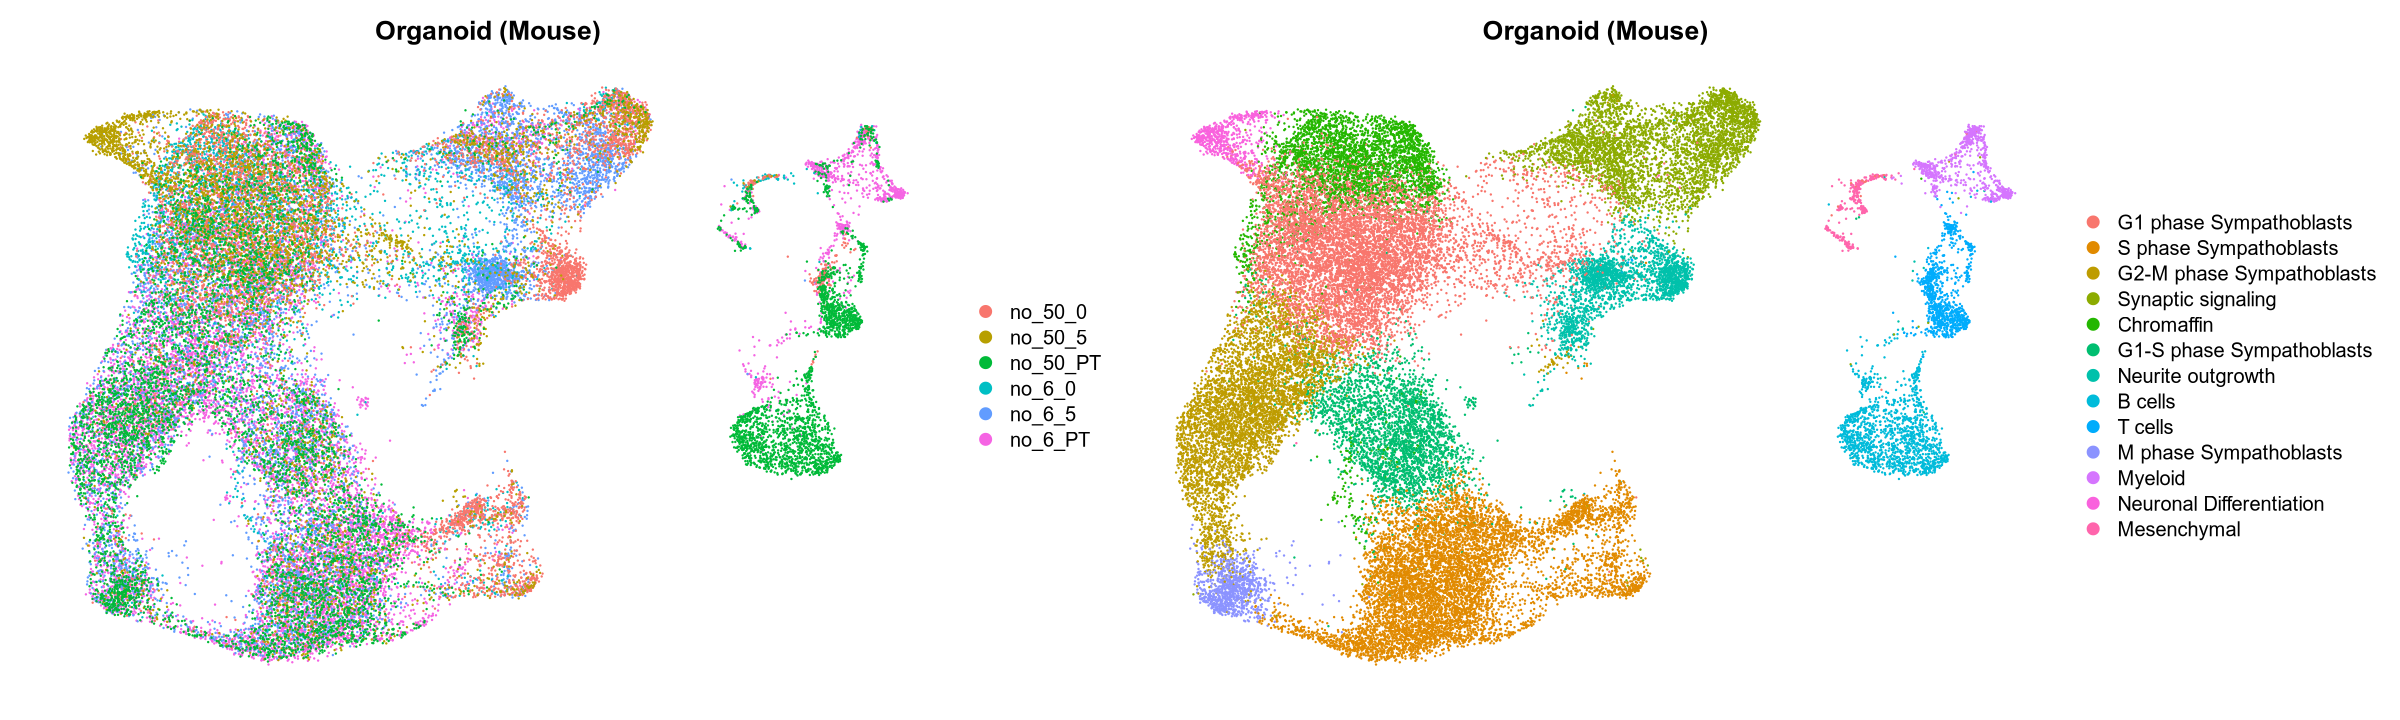

In [11]:
fig.size(6,20)
p1 = DimPlot(organoid, label = F, repel = T, reduction = "umap",
               group.by = "orig.ident")+labs(title="Organoid (Mouse)") + NoAxes()
p2 = DimPlot(organoid, label = F, repel = T, reduction = "umap",
               group.by = "annot")+labs(title="Organoid (Mouse)") + NoAxes()
p1 | p2

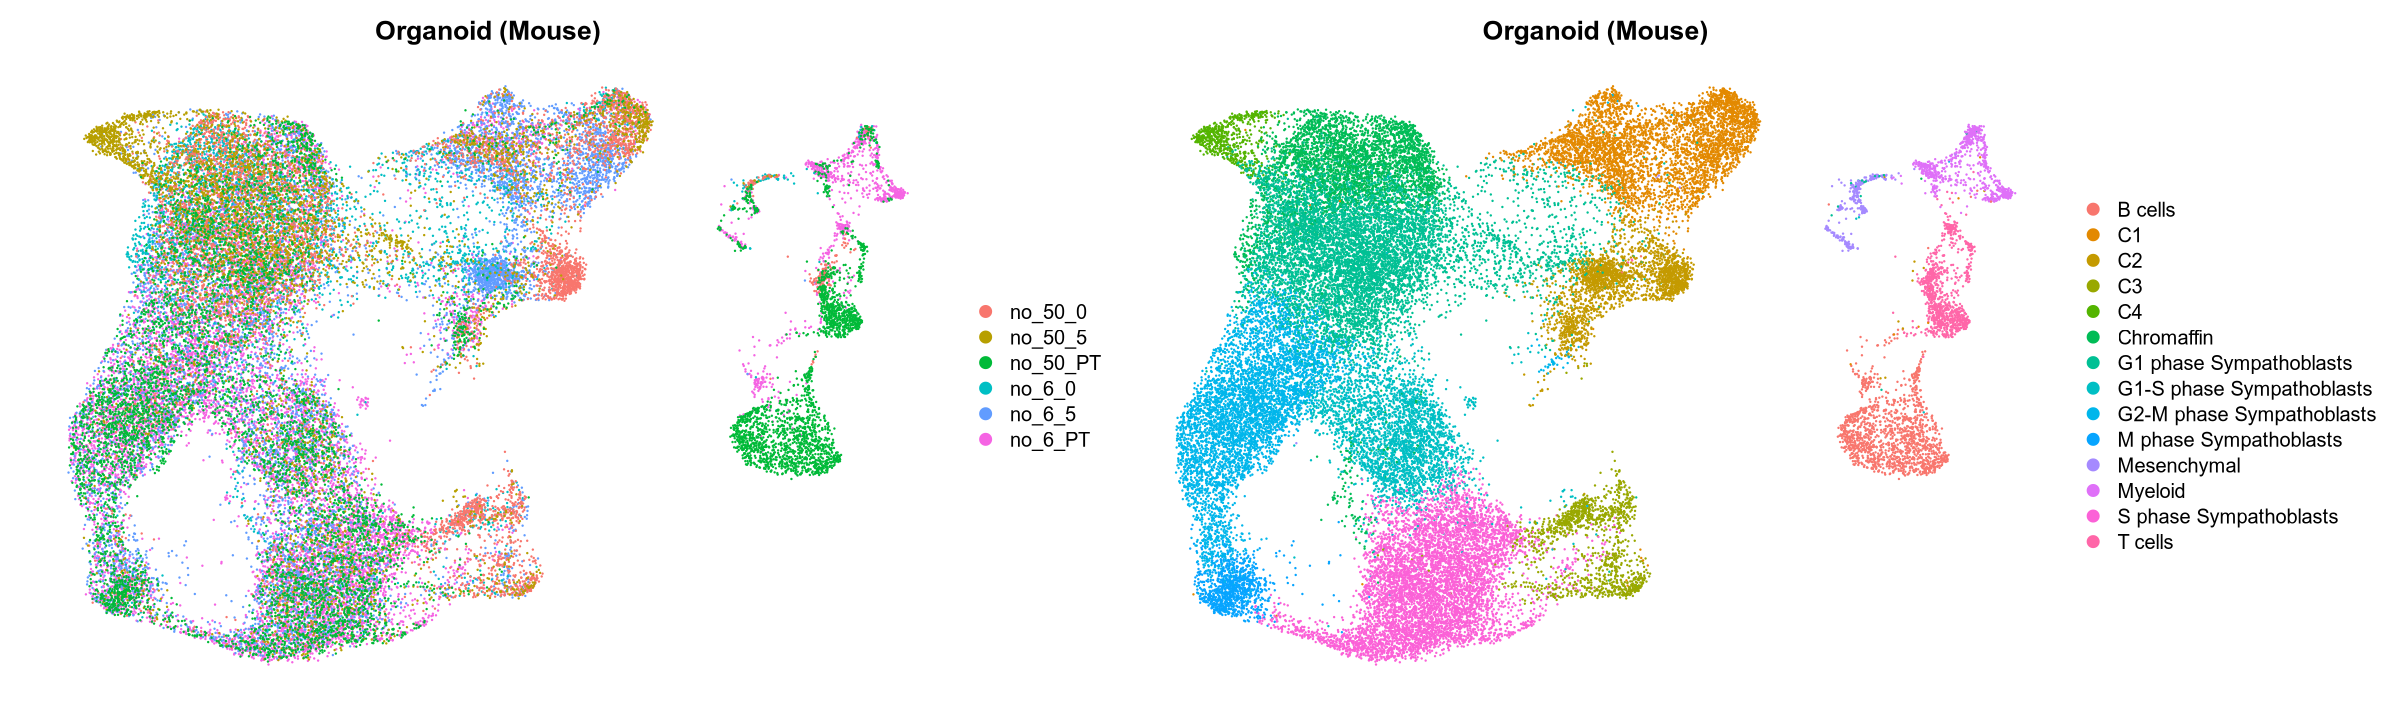

In [12]:
fig.size(6,20)
p1 = DimPlot(organoid, label = F, repel = T, reduction = "umap",
               group.by = "orig.ident")+labs(title="Organoid (Mouse)") + NoAxes()
p2 = DimPlot(organoid, label = F, repel = T, reduction = "umap",
               group.by = "new.annot")+labs(title="Organoid (Mouse)") + NoAxes()
p1 | p2

In [19]:
annot.2 = openxlsx::read.xlsx(
    "../spread_sheet/Figure5_20230828_No_6-50_Organoids_Dotplot.xlsx",
    sheet = 'Long_Dotplot'
)

In [21]:
annot.2

Annotation                Gene       
1  Chromaffin                mycn---MYCN
2  G1 phase Sympathoblasts   Phox2b     
3  G1-S phase Sympathoblasts Isl1       
4  S phase Sympathoblasts    Chga       
5  G2-M phase Sympathoblasts Sncg       
6  M phase Sympathoblasts    Caly       
7  Synaptic signaling        Th         
8  Neurite outgrowth         Nefl       
9  Neuronal Differentiation  Mcm3       
10 Mesenchymal               Hist1h1b   
11 Myeloid                   Rrm2       
12 T cells                   Cdc20      
13 B cells                   Pttg1      
14 NA                        Cenpa      
15 NA                        Ube2c      
16 NA                        Aspm       
17 NA                        Cenpf      
18 NA                        Plk1       
19 NA                        Aurka      
20 NA                        Ccnb1      
21 NA                        Nusap1     
22 NA                        Tsix       
23 NA                        Klc1       
24 NA                        Crabp1     
25 NA                        Ass1       
26 NA                        Prph       
27 NA                        Nos1       
28 NA                        Sparc      
29 NA                        Mgp        
30 NA                        Col3a1     
31 NA                        Fcer1g     
32 NA                        Lyz2       
33 NA                        Cd68       
34 NA                        Cd14       
35 NA                        Cd3d       
36 NA                        Trac       
37 NA                        Trbc2      
38 NA                        Cd79a      
39 NA                        Ms4a1      
40 NA                        Igkc       
41 NA                        Ighd

In [20]:
cell_type_order <- list(
  "Chromaffin",
  "G1 phase Sympathoblasts",
  "G1-S phase Sympathoblasts",
  "S phase Sympathoblasts",
  "G2-M phase Sympathoblasts",
  "M phase Sympathoblasts",
  "C1",
  "C2",
  "C3",
  "C4",
  "Mesenchymal",
  "Myeloid",
  "T cells",
  "B cells"
)


In [22]:
organoid@meta.data$new.annot = factor(organoid@meta.data$new.annot, levels = cell_type_order)

In [23]:
organoid@meta.data$new.annot %>% levels

[1] "Chromaffin"                "G1 phase Sympathoblasts"  
 [3] "G1-S phase Sympathoblasts" "S phase Sympathoblasts"   
 [5] "G2-M phase Sympathoblasts" "M phase Sympathoblasts"   
 [7] "C1"                        "C2"                       
 [9] "C3"                        "C4"                       
[11] "Mesenchymal"               "Myeloid"                  
[13] "T cells"                   "B cells"

In [30]:
Idents(organoid) = "new.annot"

In [31]:
organoid@active.ident = factor(organoid@active.ident, levels = cell_type_order )

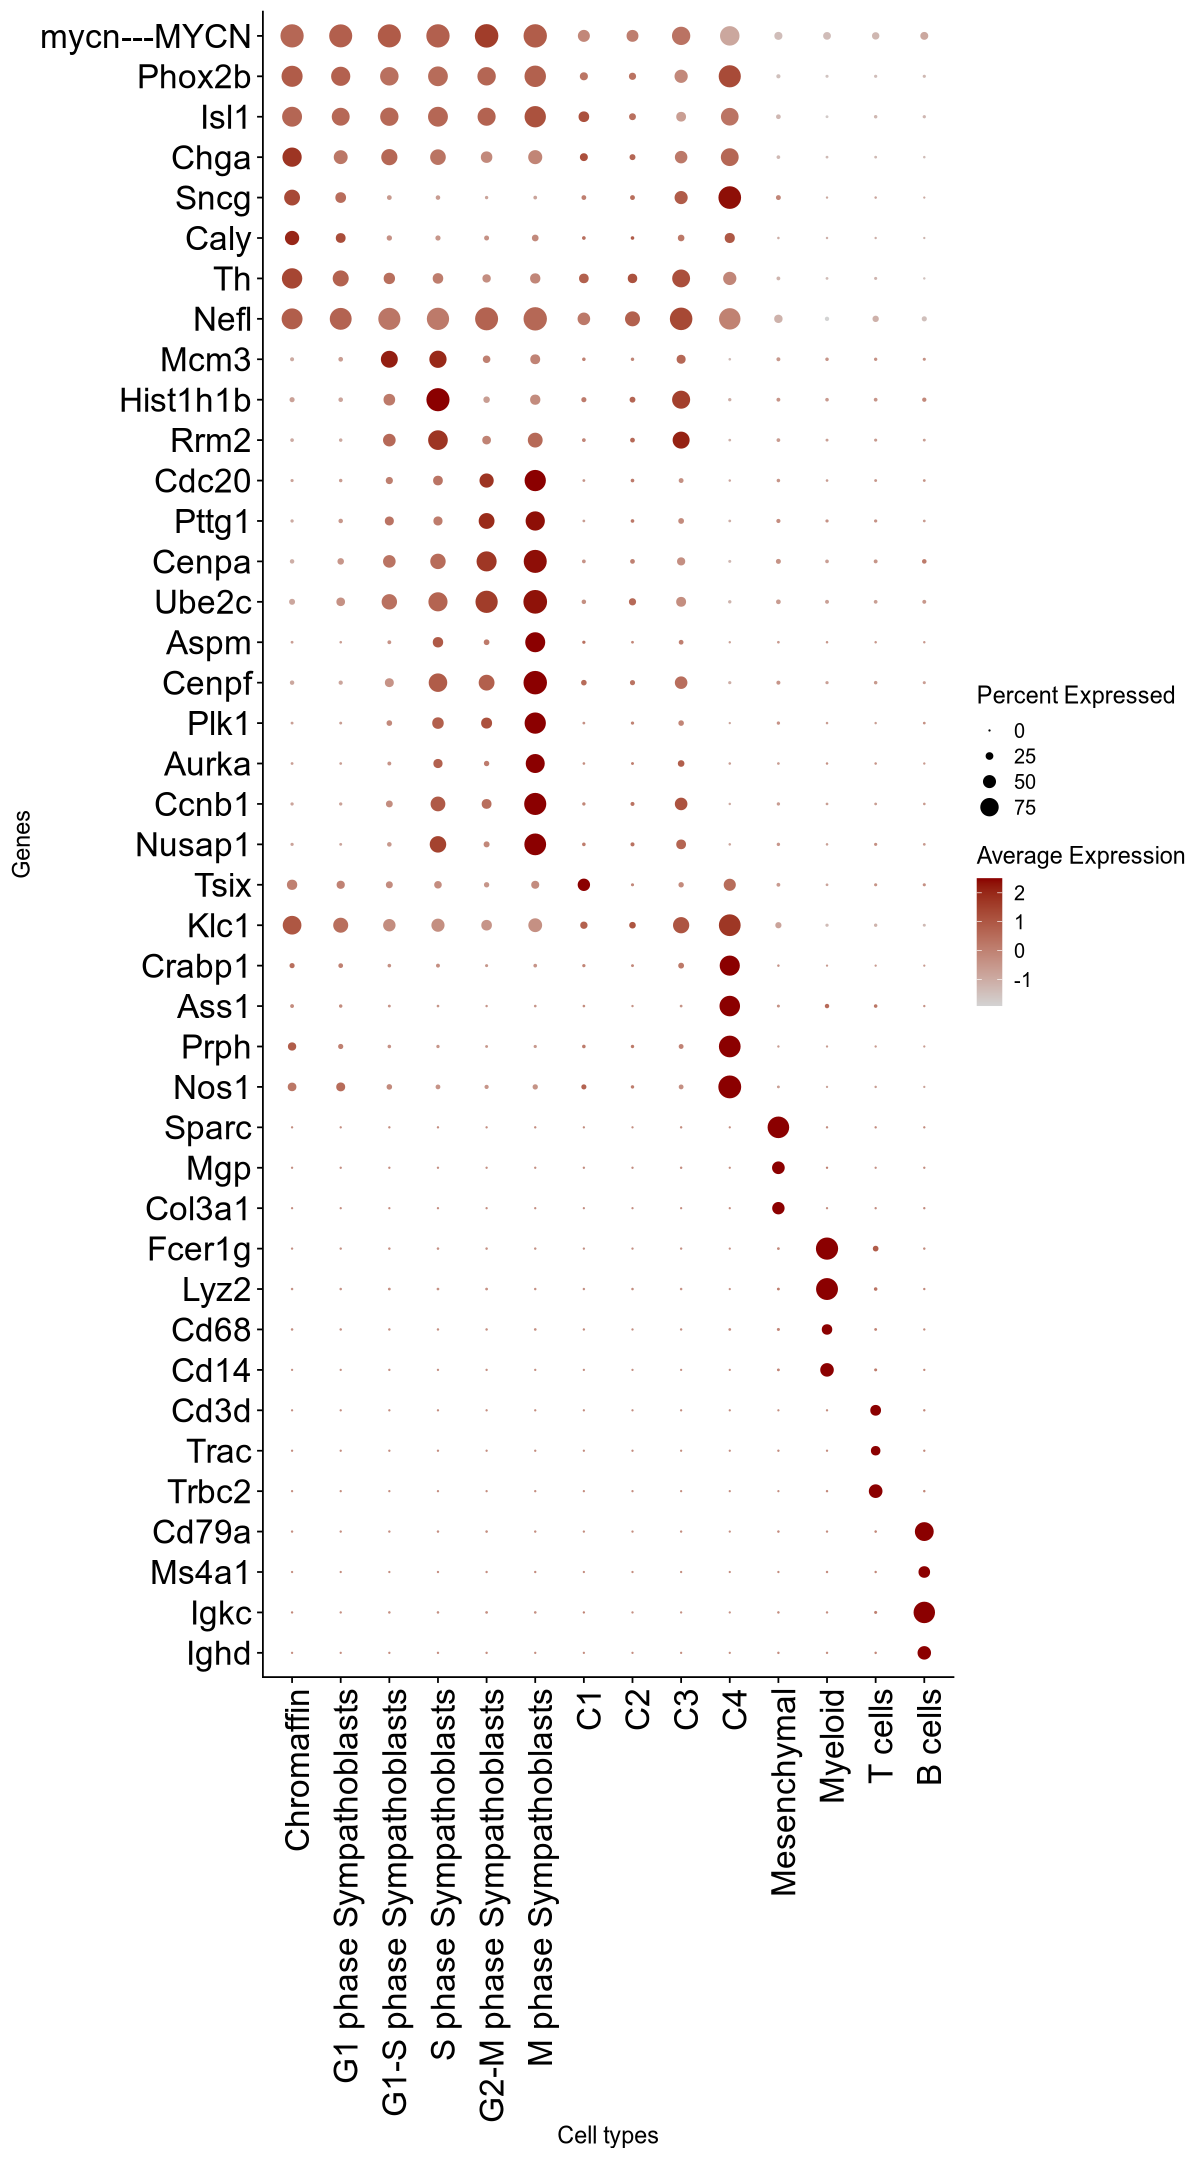

In [32]:
fig.size(18,10)
pdot = DotPlot(
        organoid, 
        assay='RNA',
        features = unique(annot.2$Gene) %>% rev,  
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(
        axis.text.x = element_text(size=20,angle = 90, hjust = 1,vjust = 0.7),
        axis.text.y = element_text(size=20)
       ) +
        xlab('Genes')+
        ylab('Cell types')
pdot

In [39]:
ggsave(
    
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_4/Figure4D_organoid_dotplot.pdf'),
    plot =pdot, 
    height = 18,
    width = 10,
    create.dir=TRUE
      )

✔ Created directory: /scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/results/figures/2024/Figure_4.



In [40]:
organoid$orig.ident %>% unique

[1] "no_6_PT"  "no_6_5"   "no_6_0"   "no_50_0"  "no_50_5"  "no_50_PT"

## Regression

In [74]:
organoid_r = organoid

In [77]:
cc.genes.mm = readRDS('~/cc.genes.mm.rds')
s.genes = cc.genes.mm$s.genes
g2m.genes = cc.genes.mm$g2m.genes

In [78]:
organoid_r <- CellCycleScoring(organoid_r, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

In [82]:
DefaultAssay(organoid_r) = "integrated"

In [136]:
organoid_r

An object of class Seurat 
36410 features across 39593 samples within 2 assays 
Active assay: integrated (5000 features, 5000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [142]:
organoid_r <- ScaleData(organoid_r, vars.to.regress = c("S.Score", "G2M.Score"), 
                        verbose = TRUE, features = rownames(organoid_r)[1:2000])

Regressing out S.Score, G2M.Score

Centering and scaling data matrix



In [143]:
organoid_r <- RunPCA(organoid_r, npcs = 30, verbose = FALSE)
organoid_r <- RunUMAP(organoid_r, reduction = "pca", dims = 1:30)
organoid_r <- FindNeighbors(organoid_r, reduction = "pca", dims = 1:30)
organoid_r <- FindClusters(organoid_r, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:56:13 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:56:13 Read 39593 rows and found 30 numeric columns

13:56:13 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:56:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:56:16 Writing NN index file to 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 39593
Number of edges: 1344511

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8857
Number of communities: 16
Elapsed time: 7 seconds


2 singletons identified. 14 final clusters.



In [145]:
color.list = ggthemes::tableau_color_pal('Tableau 20')(20)[1:14]
names(color.list) = organoid_r@meta.data$new.annot %>% unique

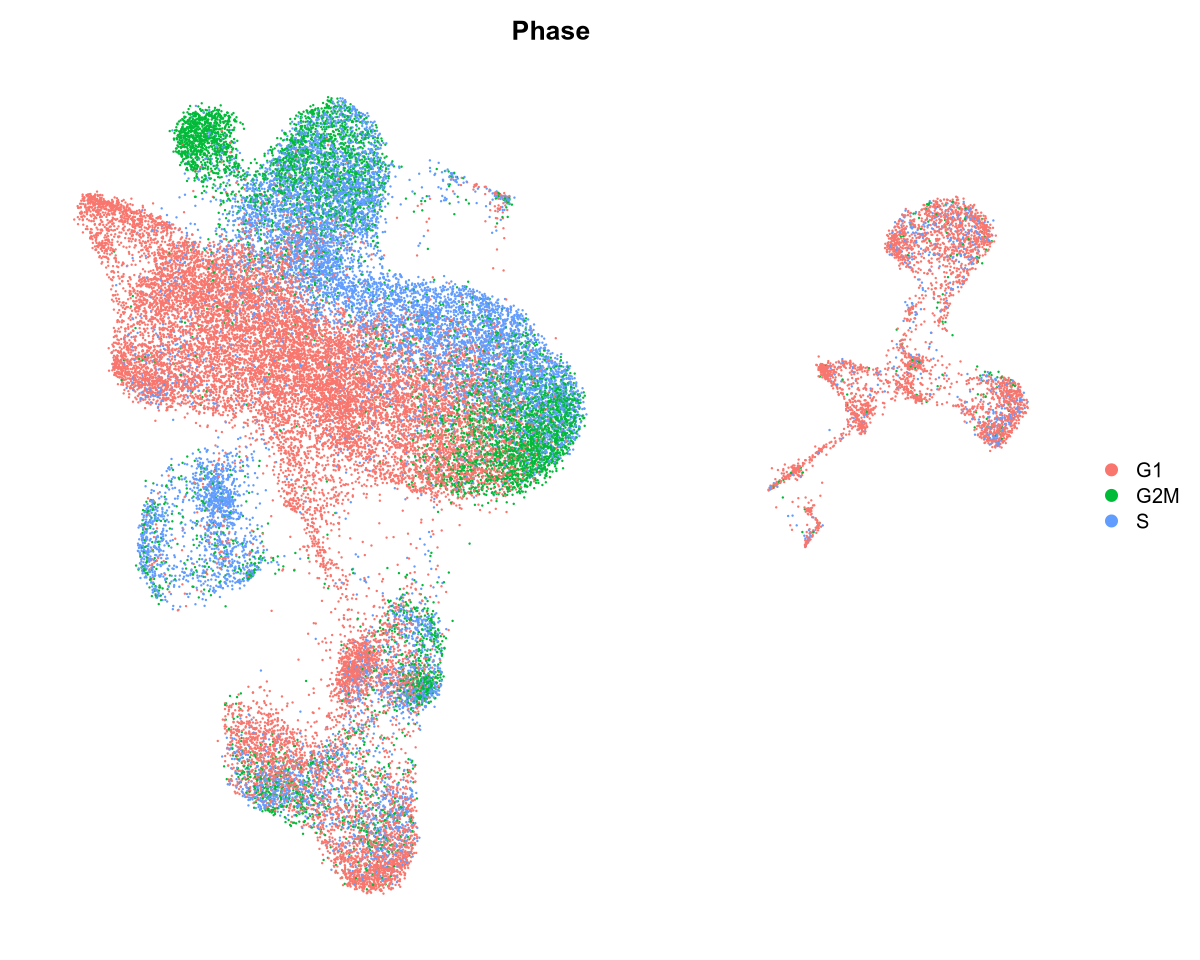

In [146]:
fig.size(8,10)
p1 = DimPlot(organoid_r, group.by = "Phase") + NoAxes()
p1

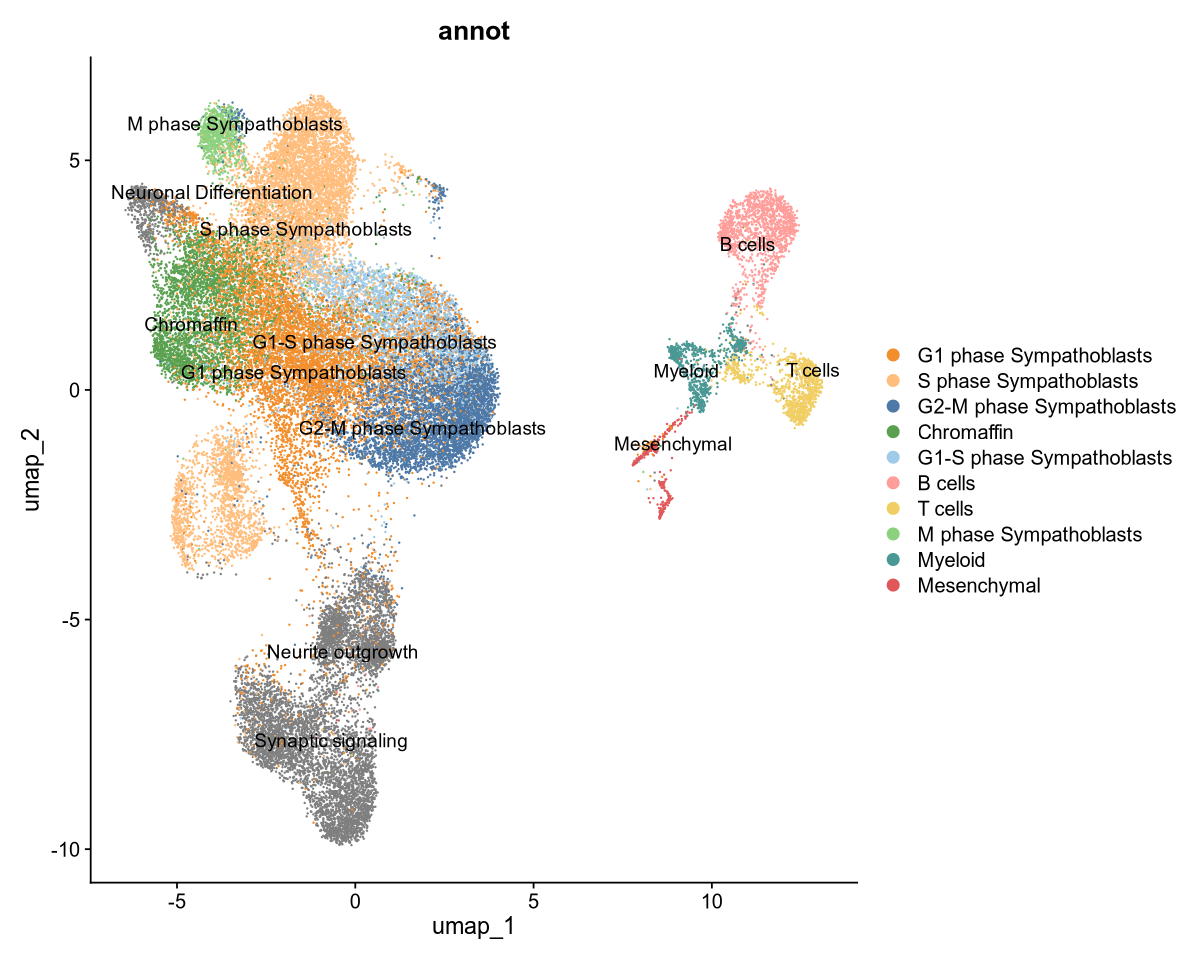

In [147]:
fig.size(8, 10)
p2 = DimPlot(organoid_r, group.by = 'annot',
        reduction = "umap", label = TRUE,
    repel = TRUE) + 
    scale_color_manual(values = color.list)
p2

In [151]:
organoid_r$sample_group <- ifelse(organoid_r$orig.ident %in% c("no_6_PT", "no_50_PT"), "in_vivo", "ex_vivo")

# Check the new metadata column
table(organoid_r$sample_group)


ex_vivo in_vivo 
  20806   18787 

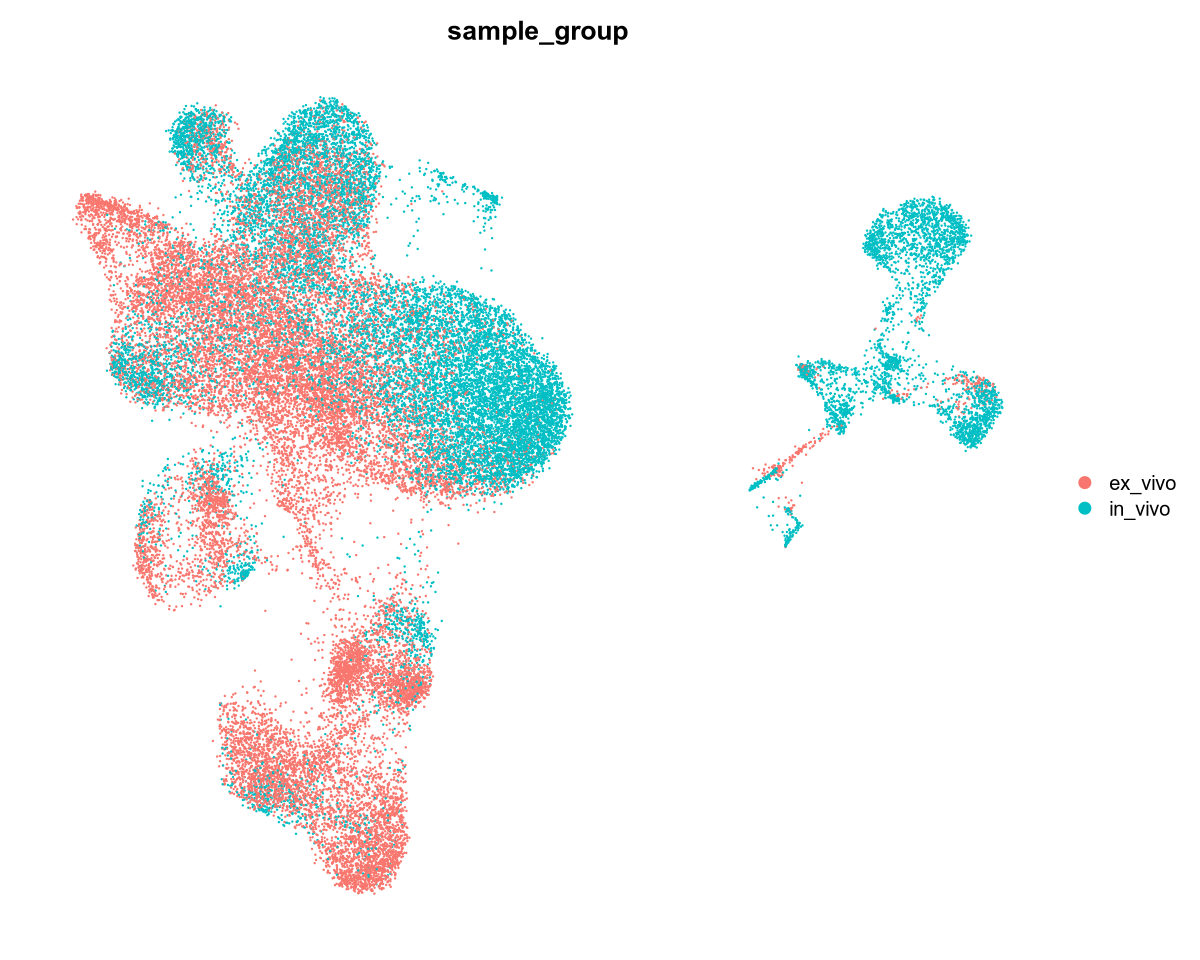

In [153]:
fig.size(8,10)
p1 = DimPlot(organoid_r, group.by = "sample_group") + NoAxes()
p1

In [148]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_5/Organoid_ccregression_labeled.pdf'),
    plot =p2, 
    height = 9,
    width = 15,
    create.dir=TRUE
      )


In [155]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_5/Organoid_samplegroup_regressed_cellcycle.pdf'),
    plot =p1, 
    height = 8,
    width = 10)

### 4 vs 2 grouping

In [41]:
# Assuming your Seurat object is named `seurat_object`

# Create a new column in metadata to define the in vivo (PT) and normal groups
organoid$sample_group <- ifelse(organoid$orig.ident %in% c("no_6_PT", "no_50_PT"), "in_vivo", "ex_vivo")

# Check the new metadata column
table(organoid$sample_group)



ex_vivo in_vivo 
  20806   18787 

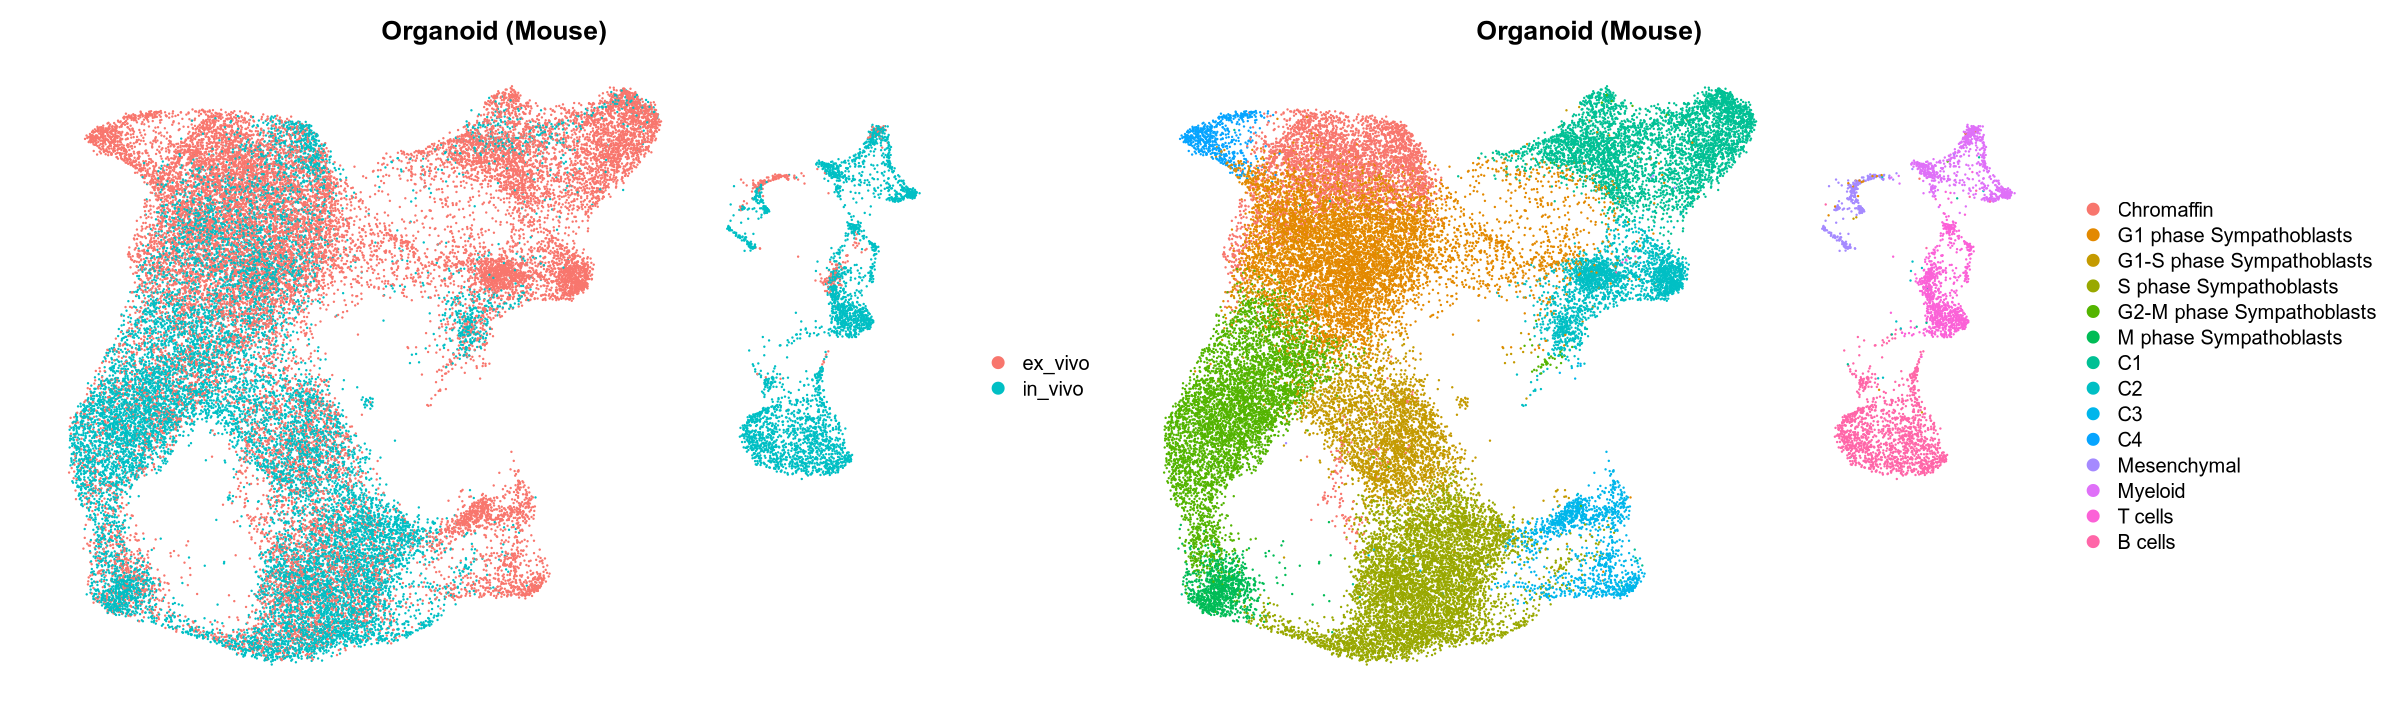

In [42]:
fig.size(6,20)
p1 = DimPlot(organoid, label = F, repel = T, reduction = "umap",
               group.by = "sample_group")+labs(title="Organoid (Mouse)") + NoAxes()
p2 = DimPlot(organoid, label = F, repel = T, reduction = "umap",
               group.by = "new.annot")+labs(title="Organoid (Mouse)") + NoAxes()
p1 | p2

In [127]:
cellxgene = read.csv(
    'CELLxGENE_gene_expression_080524.csv',
    comment.char = "#"
)

In [131]:
library(stringr)

In [132]:
cellxgene_top_5_genes_hemi = cellxgene %>%  filter(Cell.Type != 'aggregated') %>%
    mutate(Gene.Symbol = stringr::str_to_title(Gene.Symbol)) %>%
    filter(Gene.Symbol %in% rownames(organoid)) %>%
    group_by(Cell.Type) %>%
    slice_max(n=3, order_by = Expression) %>%
    pull(Gene.Symbol) %>% str_to_title() 

In [133]:
cellxgene_top_5_genes_hemi

[1] "Cd74"    "Btg1"    "Cxcr4"   "Nrxn1"   "Dst"     "Lrrtm4"  "Ccl5"   
 [8] "Btg1"    "Nkg7"    "Rbfox1"  "Cntnap2" "Dlc1"    "Cd74"    "S100a9" 
[15] "S100a8"  "Ldb2"    "Chrm3"   "Flt1"    "Cd74"    "C1qb"    "Sat1"   
[22] "Col1a2"  "Col1a1"  "Col3a1"  "Defa3"   "Cd74"    "Prtn3"   "Nkg7"   
[29] "Ccl5"    "Btg1"    "Defa3"   "S100a8"  "S100a9"  "Chga"    "Fam155a"
[36] "Ccser1"

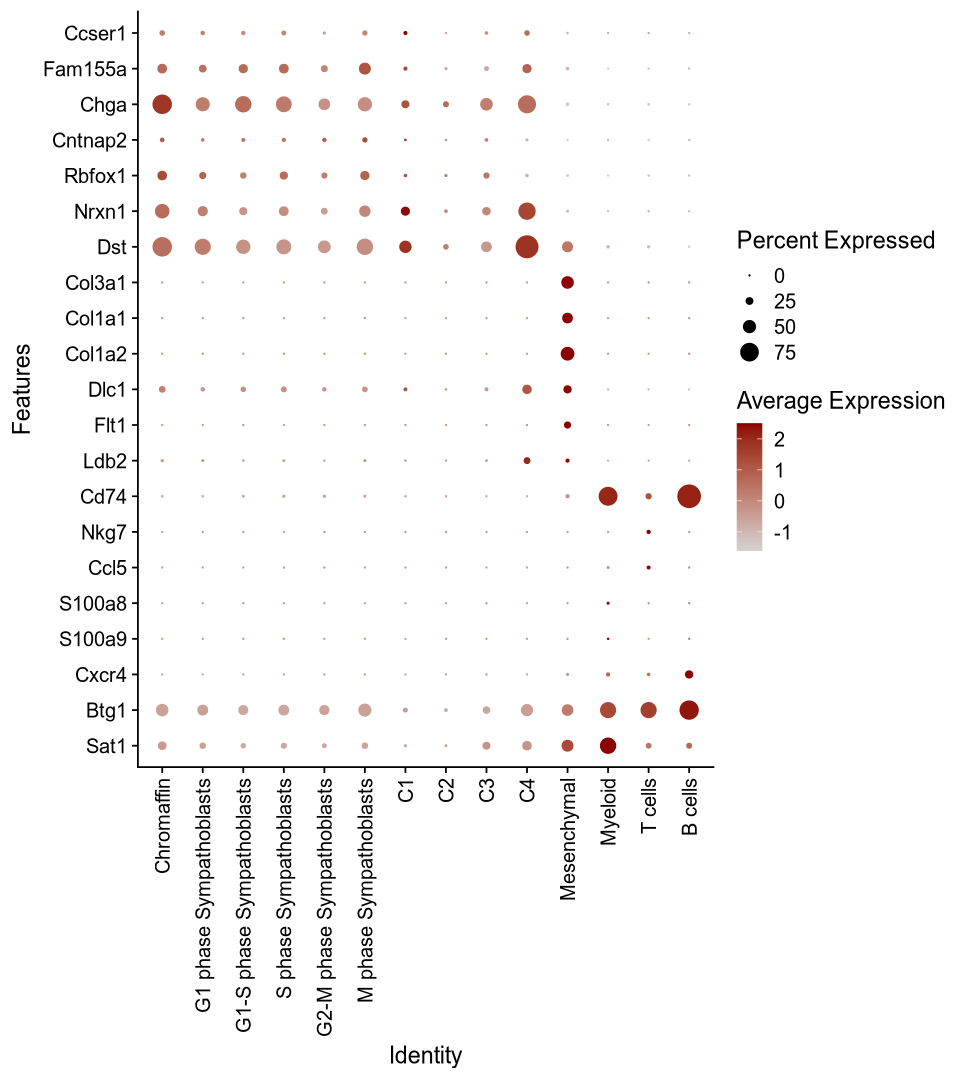

In [134]:
gene_order = c(
    'Ccser1','Fam155a','Chga',
    'Cntnap2','Rbfox1',
    'Nrxn1','Dst',
    'Col3a1','Col1a1','Col1a2',
    'Dlc1',
    'Flt1','Ldb2',
     'Cd74',
    'Nkg7','Ccl5',
    'S100a8','S100a9',
    'Cxcr4','Btg1',
    'Sat1'
)
fig.size(9,8)
phemi = DotPlot(
        organoid, 
        assay='RNA',
        features = gene_order %>% rev, 
        group.by='new.annot', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(axis.text.x = element_text(angle = 90, hjust = 1,vjust=0.5))
phemi

In [135]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_5/20240808_Figure5A_Organoid_cellxgene.pdf'),
    plot= phemi, 
    height = 9,
    width = 8,
    create.dir=TRUE
      )

In [43]:
seurat_object = organoid

In [44]:
seurat_object@meta.data %>% head

orig.ident nCount_RNA nFeature_RNA percent.mt
AAACCCAAGCGTCAGA-1_1 no_6_PT    4008       1813         4.316367  
AAACCCAAGGGCTAAC-1_1 no_6_PT    4365       2085         3.069874  
AAACCCAAGTGATAAC-1_1 no_6_PT    3649       1603         3.644834  
AAACCCACAATCGCGC-1_1 no_6_PT    7487       3030         3.058635  
AAACCCACACCTGAAT-1_1 no_6_PT    5917       2374         3.785702  
AAACCCACAGACCATT-1_1 no_6_PT    5643       2103         2.870813  
                     integrated_snn_res.0.5 seurat_clusters
AAACCCAAGCGTCAGA-1_1 2                      2              
AAACCCAAGGGCTAAC-1_1 5                      5              
AAACCCAAGTGATAAC-1_1 0                      0              
AAACCCACAATCGCGC-1_1 1                      1              
AAACCCACACCTGAAT-1_1 2                      2              
AAACCCACAGACCATT-1_1 4                      4              
                     annot                     new.annot                
AAACCCAAGCGTCAGA-1_1 G2-M phase Sympathoblasts G2-M phase Sympathoblasts
AAACCCAAGGGCTAAC-1_1 G1-S phase Sympathoblasts G1-S phase Sympathoblasts
AAACCCAAGTGATAAC-1_1 G1 phase Sympathoblasts   G1 phase Sympathoblasts  
AAACCCACAATCGCGC-1_1 S phase Sympathoblasts    S phase Sympathoblasts   
AAACCCACACCTGAAT-1_1 G2-M phase Sympathoblasts G2-M phase Sympathoblasts
AAACCCACAGACCATT-1_1 Chromaffin                Chromaffin               
                     sample_group
AAACCCAAGCGTCAGA-1_1 in_vivo     
AAACCCAAGGGCTAAC-1_1 in_vivo     
AAACCCAAGTGATAAC-1_1 in_vivo     
AAACCCACAATCGCGC-1_1 in_vivo     
AAACCCACACCTGAAT-1_1 in_vivo     
AAACCCACAGACCATT-1_1 in_vivo

In [49]:
Idents(seurat_object) <- "sample_group"
de_results_vivo <- FindMarkers(seurat_object,ident.1 = "in_vivo", ident.2 = "ex_vivo")

In [50]:
Idents(seurat_object) <- "new.annot"

In [53]:
seurat_object@meta.data %>%
  group_by(new.annot, sample_group) %>%
  summarise(count = n(), .groups = 'drop')

new.annot                 sample_group count
1  Chromaffin                ex_vivo      2747 
2  Chromaffin                in_vivo       924 
3  G1 phase Sympathoblasts   ex_vivo      5476 
4  G1 phase Sympathoblasts   in_vivo      2589 
5  G1-S phase Sympathoblasts ex_vivo      1084 
6  G1-S phase Sympathoblasts in_vivo      2065 
7  S phase Sympathoblasts    ex_vivo      1851 
8  S phase Sympathoblasts    in_vivo      4609 
9  G2-M phase Sympathoblasts ex_vivo      1333 
10 G2-M phase Sympathoblasts in_vivo      3850 
11 M phase Sympathoblasts    ex_vivo       343 
12 M phase Sympathoblasts    in_vivo       668 
13 C1                        ex_vivo      3809 
14 C1                        in_vivo       463 
15 C2                        ex_vivo      2020 
16 C2                        in_vivo       324 
17 C3                        ex_vivo      1199 
18 C3                        in_vivo        88 
19 C4                        ex_vivo       631 
20 Mesenchymal               ex_vivo       121 
21 Mesenchymal               in_vivo       194 
22 Myeloid                   ex_vivo        35 
23 Myeloid                   in_vivo       704 
24 T cells                   ex_vivo       145 
25 T cells                   in_vivo       867 
26 B cells                   ex_vivo        12 
27 B cells                   in_vivo      1442

In [52]:
# Extract the unique cell types
cell_types <- unique(seurat_object$new.annot)

# Create a list to store DE results for each cell type
de_results_list <- list()

for (cell_type in cell_types) {
    print(cell_type)
  # Define the identities for in_vivo and ex_vivo within the current cell type
  
  # Perform DE analysis between in_vivo and ex_vivo within this cell type
  de_results <- FindMarkers(seurat_object, ident.1 = "in_vivo", ident.2 = "ex_vivo",
                            group.by = "sample_group",
                            subset.ident =cell_type,
                            logfc.threshold = 0.25, min.pct = 0.1)
  
  # Store the results in the list
  de_results_list[[cell_type]] <- de_results
}

# Example: View DE results for a specific cell type



[1] "G2-M phase Sympathoblasts"
[1] "G1-S phase Sympathoblasts"
[1] "G1 phase Sympathoblasts"
[1] "S phase Sympathoblasts"
[1] "Chromaffin"
[1] "M phase Sympathoblasts"
[1] "C1"
[1] "T cells"
[1] "Myeloid"
[1] "C2"
[1] "Mesenchymal"
[1] "B cells"
[1] "C3"
[1] "C4"


ERROR: Error in WhichCells.Seurat(object = object, idents = ident.1): Cannot find the following identities in the object: in_vivo


In [58]:
lapply(de_results_list, dim)

$`G2-M phase Sympathoblasts`
[1] 4482    5

$`G1-S phase Sympathoblasts`
[1] 4962    5

$`G1 phase Sympathoblasts`
[1] 5164    5

$`S phase Sympathoblasts`
[1] 5160    5

$Chromaffin
[1] 5925    5

$`M phase Sympathoblasts`
[1] 5458    5

$C1
[1] 1874    5

$`T cells`
[1] 1450    5

$Myeloid
[1] 2953    5

$C2
[1] 1907    5

$Mesenchymal
[1] 3724    5

$`B cells`
[1] 1987    5

$C3
[1] 5760    5

In [85]:
de_results_list %>% names

[1] "G2-M phase Sympathoblasts" "G1-S phase Sympathoblasts"
 [3] "G1 phase Sympathoblasts"   "S phase Sympathoblasts"   
 [5] "Chromaffin"                "M phase Sympathoblasts"   
 [7] "C1"                        "T cells"                  
 [9] "Myeloid"                   "C2"                       
[11] "Mesenchymal"               "B cells"                  
[13] "C3"

In [59]:
length(de_results_list)

[1] 13

In [ ]:
de_results_list, length

In [60]:
merged_list <- list()

# Loop through each dataframe in the list
for (cell_type in names(de_results_list)) {
  # Retrieve the current dataframe
  df <- de_results_list[[cell_type]]
  
  # Move row names (gene names) to a new column called 'gene'
  df$gene <- rownames(df)
  
  # Reset the row names to default integer indexing
  rownames(df) <- NULL
  
  # Add a new column 'cluster' with the cell type
  df$cluster <- cell_type
  
  # Append the dataframe to the merged list
  merged_list[[cell_type]] <- df
}

# Combine all dataframes in the list into a single dataframe
merged_dataframe <- do.call(rbind, merged_list)



In [61]:
print('stop')

[1] "stop"


In [62]:
rownames(merged_dataframe) = NULL

In [67]:
merged_dataframe_filtered <- merged_dataframe %>%
    filter(p_val_adj < 0.05) %>%
    filter(avg_log2FC < -0.1) %>%
    arrange(cluster, desc(avg_log2FC))

In [68]:
gene_name_list = merged_dataframe_filtered %>% dplyr::select(gene, cluster) %>% unstack
gene_name_list = lapply(gene_name_list, unique)

In [69]:
#genesets = msigdbr(species = "mouse", category = "C2", subcategory = "CGP")
m_t2g <- msigdbr::msigdbr(species = "mouse", category = "C5", subcategory = 'GO:BP') %>% 
          dplyr::select(gs_name, gene_symbol) %>% distinct()
enrich_all_c6 <- compareCluster(gene_name_list, enricher, TERM2GENE=m_t2g, 
                             pvalueCutoff=0.05)

In [121]:
enrich_all_c6_top = enrich_all_c6 %>% data.frame %>% filter(
    Cluster %in% c("C1", "C2", "C3", "Chromaffin", 
                  'G2-M phase Sympathoblasts','G1-S phase Sympathoblasts','G1 phase Sympathoblasts','S phase Sympathoblasts','Chromaffin',
                   'M phase Sympathoblasts')
) %>% group_by(Cluster) %>%
    top_n(10, Count) %>%
    ungroup()

In [120]:
enrich_all_c6_top 

Cluster                  
1  C1                       
2  C1                       
3  C1                       
4  C1                       
5  C1                       
6  C1                       
7  C1                       
8  C2                       
9  C2                       
10 C2                       
11 C2                       
12 C2                       
13 C2                       
14 C2                       
15 C2                       
16 C2                       
17 C3                       
18 C3                       
19 C3                       
20 C3                       
21 C3                       
22 C3                       
23 C3                       
24 C3                       
25 C3                       
26 C3                       
27 C3                       
28 C3                       
29 Chromaffin               
30 Chromaffin               
⋮  ⋮                        
48 G1-S phase Sympathoblasts
49 G1-S phase Sympathoblasts
50 G1-S phase Sympathoblasts
51 G2-M phase Sympathoblasts
52 G2-M phase Sympathoblasts
53 G2-M phase Sympathoblasts
54 G2-M phase Sympathoblasts
55 G2-M phase Sympathoblasts
56 G2-M phase Sympathoblasts
57 G2-M phase Sympathoblasts
58 G2-M phase Sympathoblasts
59 G2-M phase Sympathoblasts
60 G2-M phase Sympathoblasts
61 G2-M phase Sympathoblasts
62 M phase Sympathoblasts   
63 M phase Sympathoblasts   
64 M phase Sympathoblasts   
65 M phase Sympathoblasts   
66 M phase Sympathoblasts   
67 M phase Sympathoblasts   
68 M phase Sympathoblasts   
69 M phase Sympathoblasts   
70 M phase Sympathoblasts   
71 S phase Sympathoblasts   
72 S phase Sympathoblasts   
73 S phase Sympathoblasts   
74 S phase Sympathoblasts   
75 S phase Sympathoblasts   
76 S phase Sympathoblasts   
77 S phase Sympathoblasts   
   ID                                                       
1  GOBP_CYTOPLASMIC_TRANSLATION                             
2  GOBP_AXON_DEVELOPMENT                                    
3  GOBP_REGULATION_OF_NEURON_PROJECTION_DEVELOPMENT         
4  GOBP_REGULATION_OF_SUPRAMOLECULAR_FIBER_ORGANIZATION     
5  GOBP_REGULATION_OF_MEMBRANE_POTENTIAL                    
6  GOBP_RIBONUCLEOPROTEIN_COMPLEX_BIOGENESIS                
7  GOBP_REGULATION_OF_ANATOMICAL_STRUCTURE_SIZE             
8  GOBP_OXIDATIVE_PHOSPHORYLATION                           
9  GOBP_AEROBIC_RESPIRATION                                 
10 GOBP_ATP_METABOLIC_PROCESS                               
11 GOBP_CELLULAR_RESPIRATION                                
12 GOBP_AXON_DEVELOPMENT                                    
13 GOBP_POSITIVE_REGULATION_OF_CELL_PROJECTION_ORGANIZATION 
14 GOBP_REGULATION_OF_NEURON_PROJECTION_DEVELOPMENT         
15 GOBP_ENERGY_DERIVATION_BY_OXIDATION_OF_ORGANIC_COMPOUNDS 
16 GOBP_SYNAPSE_ORGANIZATION                                
17 GOBP_ATP_METABOLIC_PROCESS                               
18 GOBP_AXON_DEVELOPMENT                                    
19 GOBP_PROTEIN_CONTAINING_COMPLEX_DISASSEMBLY              
20 GOBP_REGULATION_OF_AUTOPHAGY                             
21 GOBP_CELLULAR_COMPONENT_DISASSEMBLY                      
22 GOBP_POSITIVE_REGULATION_OF_CELL_PROJECTION_ORGANIZATION 
23 GOBP_RESPONSE_TO_METAL_ION                               
24 GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY      
25 GOBP_REGULATION_OF_TRANS_SYNAPTIC_SIGNALING              
26 GOBP_RIBOSE_PHOSPHATE_METABOLIC_PROCESS                  
27 GOBP_PURINE_CONTAINING_COMPOUND_METABOLIC_PROCESS        
28 GOBP_SYNAPSE_ORGANIZATION                                
29 GOBP_AXON_DEVELOPMENT                                    
30 GOBP_REGULATION_OF_NEURON_PROJECTION_DEVELOPMENT         
⋮  ⋮                                                        
48 GOBP_CELLULAR_COMPONENT_DISASSEMBLY                      
49 GOBP_POSITIVE_REGULATION_OF_PROTEIN_LOCALIZATION         
50 GOBP_POSITIVE_REGULATION_OF_CELLULAR_COMPONENT_BIOGENESIS
51 GOBP_AXON_DEVELOPMENT                                    
52 GOBP_R

In [122]:
enrich_all_c6_top  = enrich_all_c6_top %>% 
    mutate(id_toplot = gsub("GOBP_", "",ID)) %>%
    mutate(id_toplot = gsub("_", " ", id_toplot)) 
    

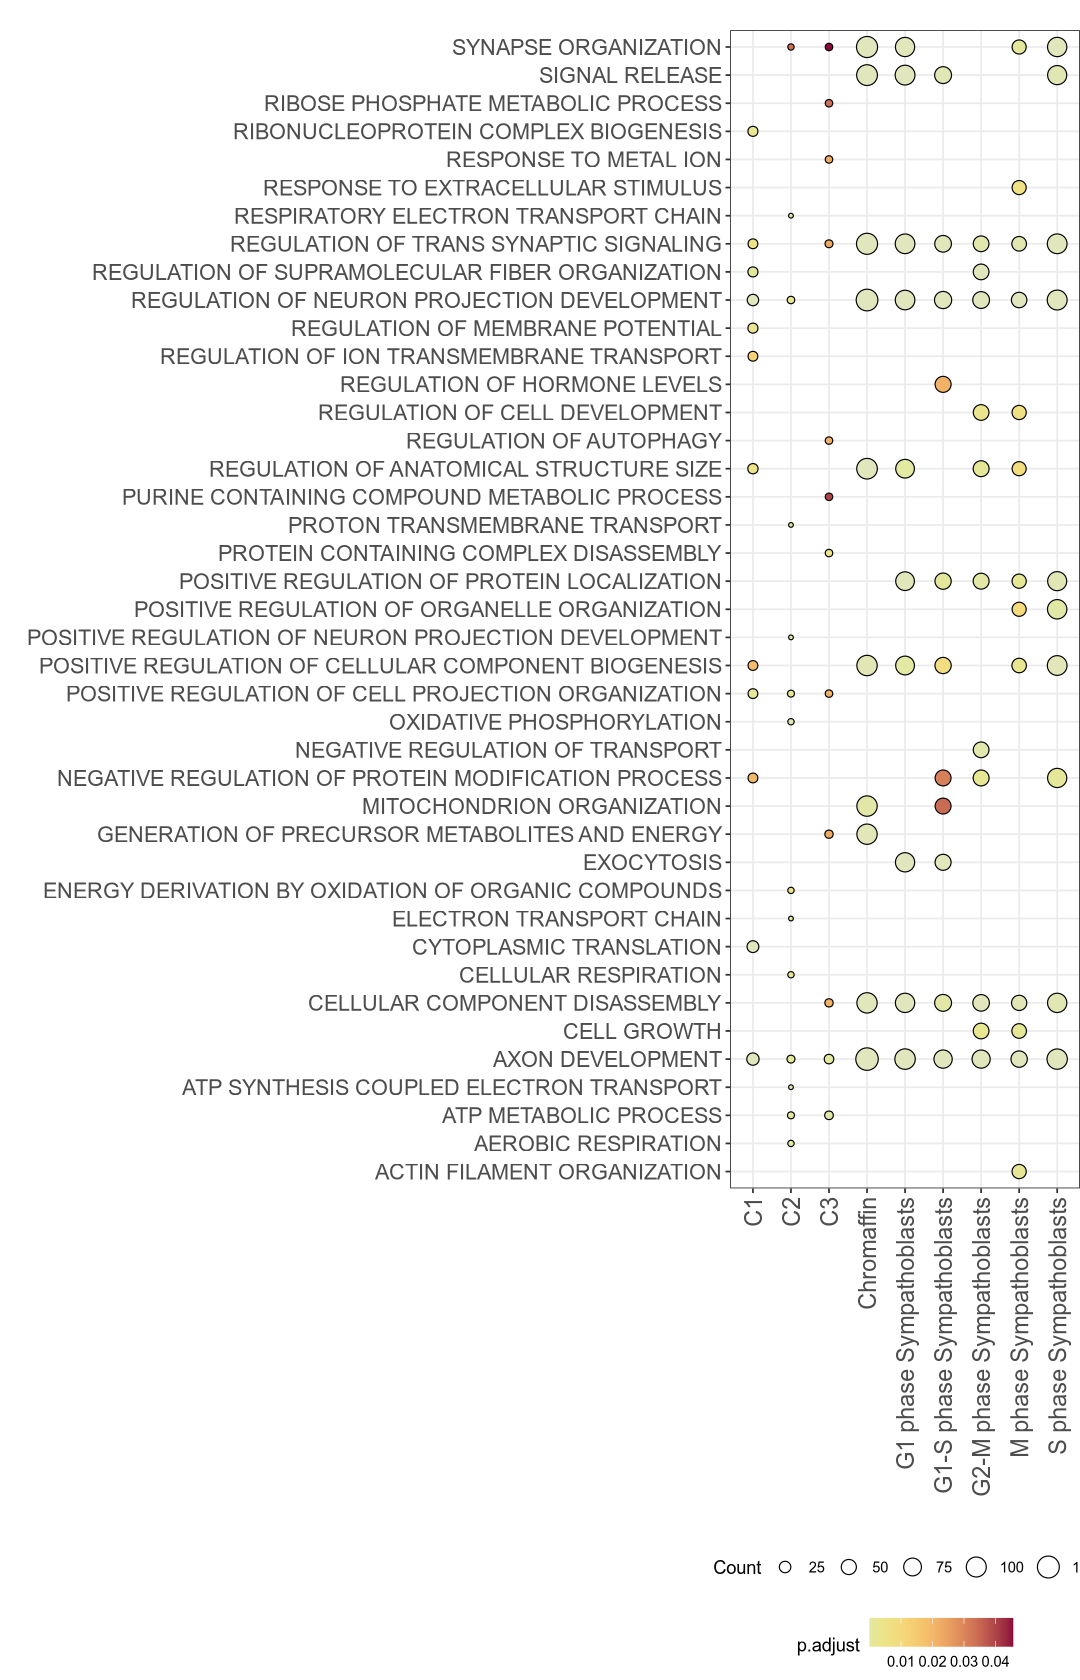

In [125]:
fig.size(14,9)
msigdb_organoid_dotplot = ggplot(enrich_all_c6_top, aes_string(x="Cluster", y="id_toplot", 
                                     fill="p.adjust", size="Count")) +
  geom_point(shape=21, color="black") +
  paletteer::scale_fill_paletteer_c("grDevices::Heat" , direction = -1) + # "viridis::plasma" 
    # breaks = -log10(c(FDR_cutoff,0.01,0.001,0.0001, 0)), 
    # labels = c(FDR_cutoff,"0.01","0.001","0.0001","0")) +
  scale_size(range=c(1,6)) +
  theme(axis.text = element_text(size=12, color="black")) + 
  labs(y="", x="",title="", size='Count', fill="p.adjust") +
  theme_bw() +
  theme(axis.text.y = element_text(size=13)) +
  theme(legend.position="bottom", legend.box="vertical", 
       # plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
       axis.text.x = element_text(size=14, angle = 90, vjust = 0.5, hjust=1),
                                  plot.margin = margin(0,0,0,0,'pt')) 
msigdb_organoid_dotplot

In [126]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_5/Figure_5E_organoid_msigdb.pdf'),
    plot = msigdb_organoid_dotplot, 
    height = 14,
    width = 9,
    create.dir=TRUE
      )


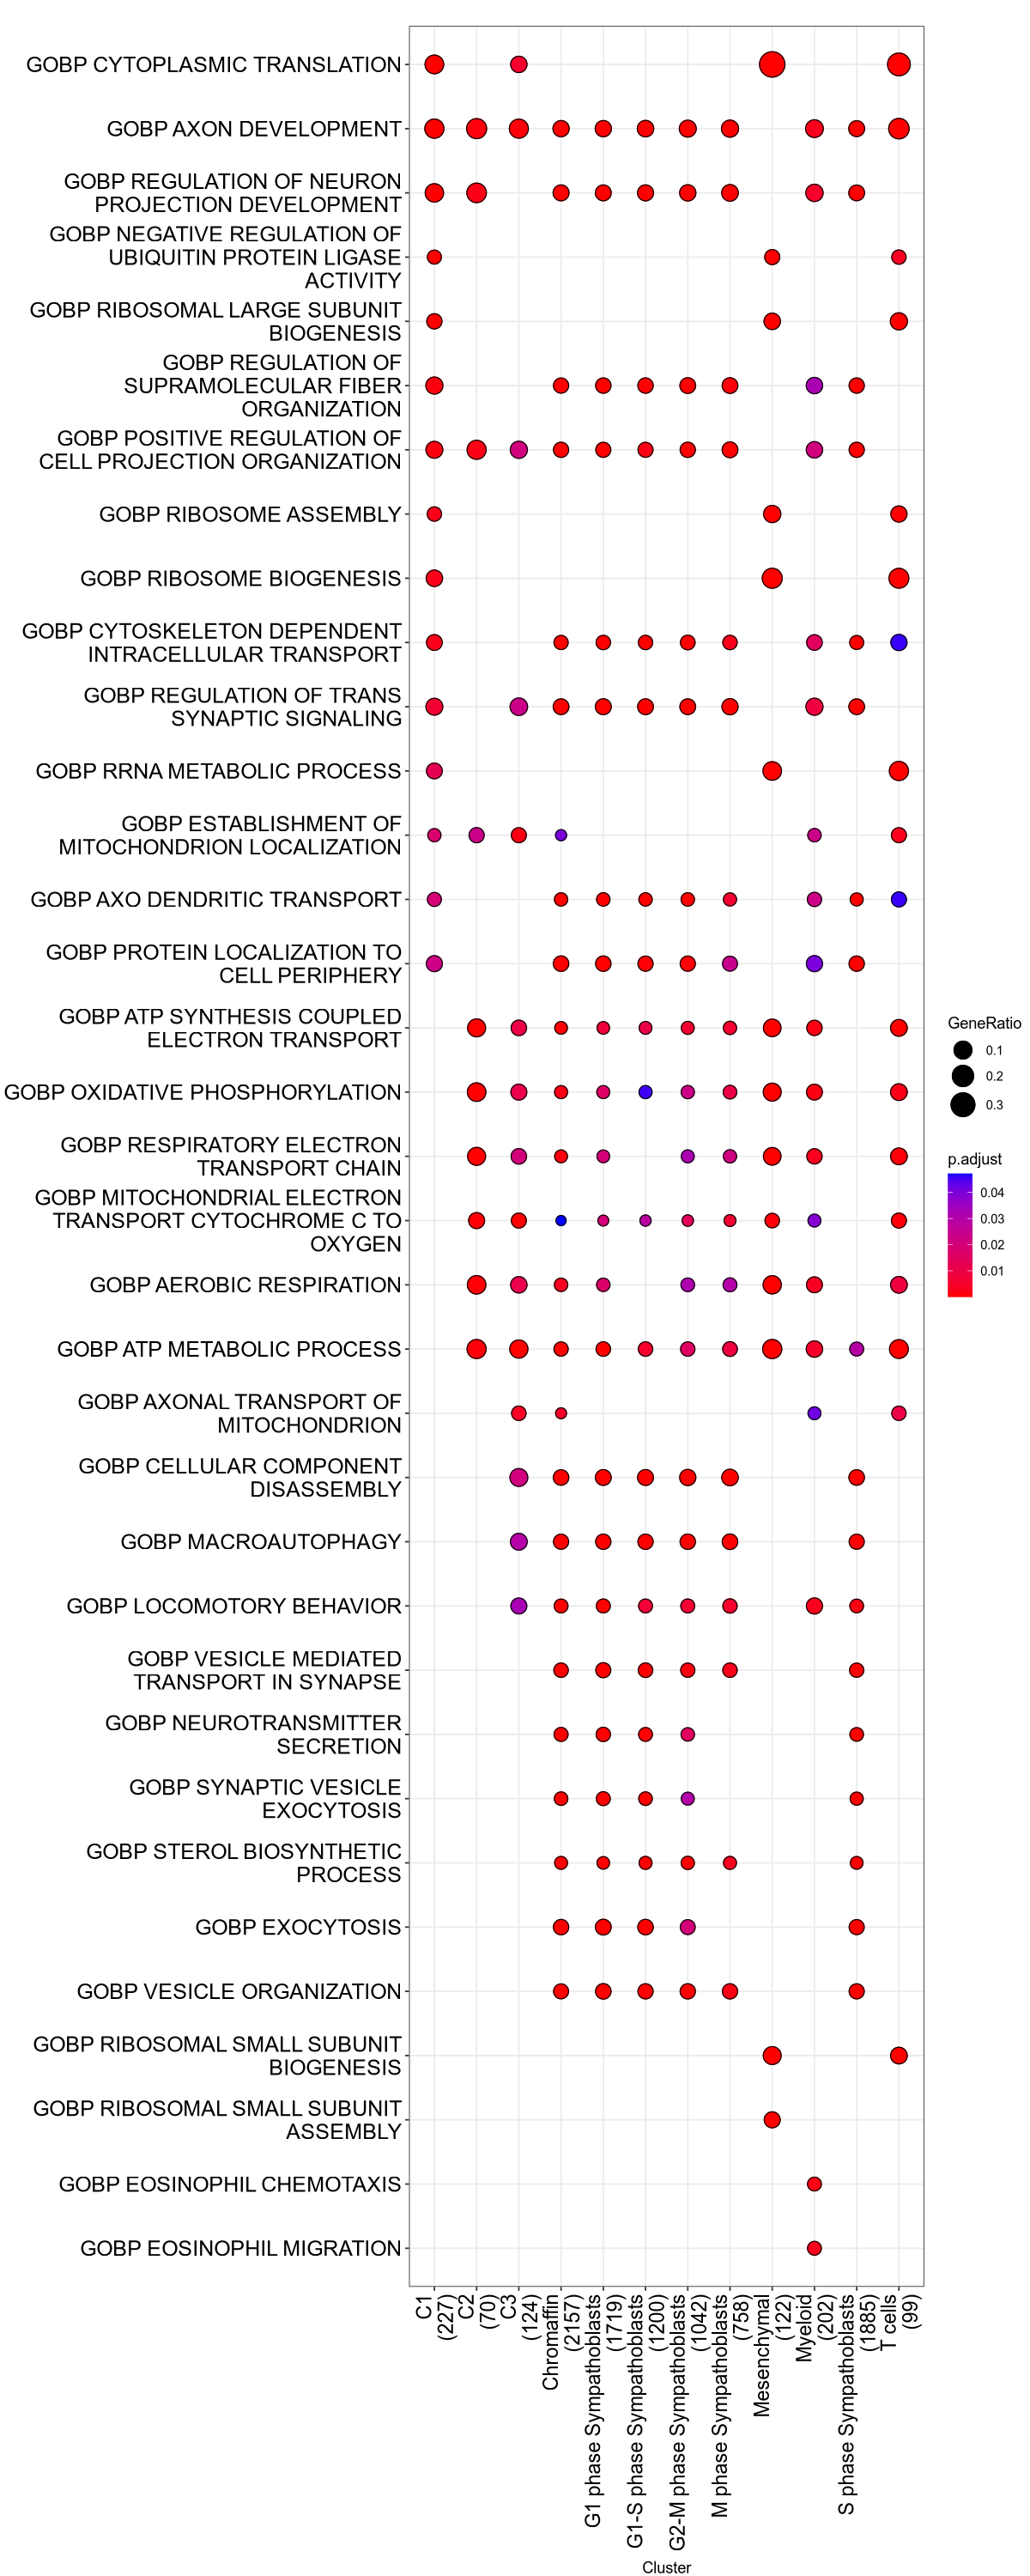

In [73]:
fig.size(25,10)
dotplot(enrich_all_c6) + 
  theme_bw() + 
  geom_point(shape=21, color="black") + 
  theme(legend.position = "right", 
        axis.text = element_text(color="black"), 
        axis.text.x = element_text(size=14, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        plot.margin = margin(0,0,0,0,'pt')) + 
  paletteer::scale_fill_paletteer_c("grDevices::Heat" , direction = -1) 

In [102]:
enrich_all_c6 

#
# Result of Comparing 12 gene clusters 
#
#.. @fun 	 enricher 
#.. @geneClusters 	List of 12
 $ B cells                  : chr "Gm42418"
 $ Chromaffin               : chr [1:1433] "H19" "Sfrp2" "Hspa1a" "Asb4" ...
 $ G1 phase Sympathoblasts  : chr [1:2403] "H19" "Arhgap36" "Htr3a" "Sfrp2" ...
 $ G1-S phase Sympathoblasts: chr [1:1756] "H19" "Htr3a" "Fzd2" "Lypd1" ...
 $ G2-M phase Sympathoblasts: chr [1:1959] "Plxnd1" "St18" "Cidea" "Lypd1" ...
 $ M phase Sympathoblasts   : chr [1:911] "Fzd2" "Cidea" "Htr3a" "Lypd1" ...
 $ Mesenchymal              : chr [1:91] "Mfap5" "Ly6a" "Aqp1" "Tagln" ...
 $ Myeloid                  : chr [1:27] "Il1b" "Plac8" "Cytip" "Ifi27l2a" ...
 $ Neurite outgrowth        : chr [1:1207] "Arhgap36" "Ppp1r17" "Cidea" "Mdk" ...
 $ S phase Sympathoblasts   : chr [1:2760] "H19" "Sfrp2" "Fzd2" "Htr3a" ...
 $ Synaptic signaling       : chr [1:356] "Adgrg1" "Eya4" "Dach1" "Cidea" ...
 $ T cells                  : chr [1:54] "Hspa1a" "Hspa1b" "Rgs1" "Cd74" ...
#...R

In [103]:
enrichment_df <- as.data.frame(enrich_all_c6 )

In [117]:
enrichment_df <- enrichment_df %>%
  group_by(Cluster) %>%
  arrange(p.adjust) %>%  # Arrange by p.adjust in ascending order (most significant first)
  slice_head(n = 8)

In [118]:
enrichment_df$log_p_adjust <- -log10(enrichment_df$p.adjust)

In [130]:
heatmap_data <- dcast(enrichment_df, Description ~ Cluster, value.var = "log_p_adjust")

Warning message:
“The dcast generic in data.table has been passed a grouped_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. Please do this redirection yourself like reshape2::dcast(enrichment_df). In the next version, this warning will become an error.”


In [131]:
heatmap_data[is.na(heatmap_data)] <- 0

In [132]:
heatmap_data

Description                                               Chromaffin
1  GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION                         0.00000  
2  GOBP_CELL_CELL_JUNCTION_ASSEMBLY                           0.00000  
3  GOBP_CELL_CHEMOTAXIS                                       0.00000  
4  GOBP_CHAPERONE_COFACTOR_DEPENDENT_PROTEIN_REFOLDING        0.00000  
5  GOBP_CYTOPLASMIC_TRANSLATION                               0.00000  
6  GOBP_DE_NOVO_PROTEIN_FOLDING                               0.00000  
7  GOBP_MAINTENANCE_OF_LOCATION                               0.00000  
8  GOBP_MAINTENANCE_OF_LOCATION_IN_CELL                       0.00000  
9  GOBP_MRNA_PROCESSING                                      63.75170  
10 GOBP_NCRNA_PROCESSING                                      0.00000  
11 GOBP_POSITIVE_REGULATION_OF_RESPONSE_TO_EXTERNAL_STIMULUS  0.00000  
12 GOBP_POSITIVE_REGULATION_OF_VASCULATURE_DEVELOPMENT        0.00000  
13 GOBP_POSTTRANSCRIPTIONAL_REGULATION_OF_GENE_EXPRESSION     0.00000  
14 GOBP_PROTEIN_FOLDING                                       0.00000  
15 GOBP_PROTEIN_REFOLDING                                     0.00000  
16 GOBP_REGULATION_OF_LEUKOCYTE_PROLIFERATION                 0.00000  
17 GOBP_REGULATION_OF_MRNA_METABOLIC_PROCESS                  0.00000  
18 GOBP_REGULATION_OF_PROTEIN_POLYMERIZATION                  0.00000  
19 GOBP_REGULATION_OF_VASCULATURE_DEVELOPMENT                 0.00000  
20 GOBP_RESPONSE_TO_TRANSFORMING_GROWTH_FACTOR_BETA           0.00000  
21 GOBP_RIBONUCLEOPROTEIN_COMPLEX_BIOGENESIS                 75.52947  
22 GOBP_RIBOSOME_BIOGENESIS                                  49.42800  
23 GOBP_RNA_SPLICING                                         64.26345  
24 GOBP_RNA_SPLICING_VIA_TRANSESTERIFICATION_REACTIONS       58.63991  
25 GOBP_RRNA_METABOLIC_PROCESS                                0.00000  
   G1 phase Sympathoblasts G1-S phase Sympathoblasts G2-M phase Sympathoblasts
1    0.00000                0.00000                   0.00000                 
2    0.00000                0.00000                   0.00000                 
3    0.00000                0.00000                   0.00000                 
4    0.00000                0.00000                   0.00000                 
5    0.00000                0.00000                   0.00000                 
6    0.00000                0.00000                   0.00000                 
7    0.00000                0.00000                   0.00000                 
8    0.00000                0.00000                   0.00000                 
9   77.92370                0.00000                  46.41847                 
10   0.00000               53.15215                   0.00000                 
11   0.00000                0.00000                   0.00000                 
12   0.00000                0.00000                   0.00000                 
13   0.00000                0.00000                   0.00000                 
14   0.00000                0.00000                   0.00000                 
15   0.00000                0.00000                   0.00000                 
16   0.00000                0.00000                   0.00000                 
17   0.00000                0.00000                   0.00000                 
18   0.00000                0.00000                   0.00000                 
19   0.00000                0.00000                   0.00000                 
20   0.00000                0.00000                   0.00000                 
21 110.79547               91.66680                  82.36193                 
22  72.01322               65.34380                  59.71257                 
23  78.51801               54.79621                  46.55954                 
24  72.58479                0.00000                   0.00000                 
25   0.00000               52.28627                  45.95470                 
   M phase Sympathoblasts Mesenchymal Myeloid  Neurite outgrowth
1   0.00000 

In [133]:

rownames(heatmap_data) <- heatmap_data$Description
heatmap_data <- heatmap_data[,-1]  # Remove the 'Description' column

# View the matrix
head(heatmap_data)

Chromaffin
GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION                  0         
GOBP_CELL_CELL_JUNCTION_ASSEMBLY                    0         
GOBP_CELL_CHEMOTAXIS                                0         
GOBP_CHAPERONE_COFACTOR_DEPENDENT_PROTEIN_REFOLDING 0         
GOBP_CYTOPLASMIC_TRANSLATION                        0         
GOBP_DE_NOVO_PROTEIN_FOLDING                        0         
                                                    G1 phase Sympathoblasts
GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION                  0                      
GOBP_CELL_CELL_JUNCTION_ASSEMBLY                    0                      
GOBP_CELL_CHEMOTAXIS                                0                      
GOBP_CHAPERONE_COFACTOR_DEPENDENT_PROTEIN_REFOLDING 0                      
GOBP_CYTOPLASMIC_TRANSLATION                        0                      
GOBP_DE_NOVO_PROTEIN_FOLDING                        0                      
                                                    G1-S phase Sympathoblasts
GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION                  0                        
GOBP_CELL_CELL_JUNCTION_ASSEMBLY                    0                        
GOBP_CELL_CHEMOTAXIS                                0                        
GOBP_CHAPERONE_COFACTOR_DEPENDENT_PROTEIN_REFOLDING 0                        
GOBP_CYTOPLASMIC_TRANSLATION                        0                        
GOBP_DE_NOVO_PROTEIN_FOLDING                        0                        
                                                    G2-M phase Sympathoblasts
GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION                  0                        
GOBP_CELL_CELL_JUNCTION_ASSEMBLY                    0                        
GOBP_CELL_CHEMOTAXIS                                0                        
GOBP_CHAPERONE_COFACTOR_DEPENDENT_PROTEIN_REFOLDING 0                        
GOBP_CYTOPLASMIC_TRANSLATION                        0                        
GOBP_DE_NOVO_PROTEIN_FOLDING                        0                        
                                                    M phase Sympathoblasts
GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION                   0.00000              
GOBP_CELL_CELL_JUNCTION_ASSEMBLY                     0.00000              
GOBP_CELL_CHEMOTAXIS                                 0.00000              
GOBP_CHAPERONE_COFACTOR_DEPENDENT_PROTEIN_REFOLDING  0.00000              
GOBP_CYTOPLASMIC_TRANSLATION                        22.76843              
GOBP_DE_NOVO_PROTEIN_FOLDING                         0.00000              
                                                    Mesenchymal Myeloid 
GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION                  5.581714    0.000000
GOBP_CELL_CELL_JUNCTION_ASSEMBLY                    5.581714    0.000000
GOBP_CELL_CHEMOTAXIS                                0.000000    3.137331
GOBP_CHAPERONE_COFACTOR_DEPENDENT_PROTEIN_REFOLDING 0.000000    0.000000
GOBP_CYTOPLASMIC_TRANSLATION                        0.000000    0.000000
GOBP_DE_NOVO_PROTEIN_FOLDING                        0.000000    0.000000
                                                    Neurite outgrowth
GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION                   0.00000         
GOBP_CELL_CELL_JUNCTION_ASSEMBLY                     0.00000         
GOBP_CELL_CHEMOTAXIS                                 0.00000         
GOBP_CHAPERONE_COFACTOR_DEPENDENT_PROTEIN_REFOLDING  0.00000         
GOBP_CYTOPLASMIC_TRANSLATION                        48.78856         
GOBP_DE_NOVO_PROTEIN_FOLDING                         0.00000         
                                                    S phase Sympathoblasts
GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION                  0                     
GOBP_CELL_CELL_JUNCTION_ASSEMBLY                    0                     
GOBP_CELL_CHEMOTAXIS                                0                     
GOBP_CHAPERONE_COFACTOR_DEPENDENT_PROTEIN_REFOLDING 0                     
GOBP_CYTOPLASMIC_TRANSLATION                        0                     
GOBP_DE_NOV

In [134]:
rownames(heatmap_data) <- gsub("^GOBP_", "", rownames(heatmap_data))
rownames(heatmap_data) <- tolower(rownames(heatmap_data))

In [140]:
library(pheatmap)
fig.size(10,10)
# Generate the heatmap
p = pheatmap(heatmap_data,
         cluster_rows = FALSE,  # Cluster the rows (GO terms)
         cluster_cols = FALSE,  # If you want to cluster columns as well, set this to TRUE
         scale = "none",  # Do not scale the data since we're using -log10(p.adjust)
         color = colorRampPalette(c("white", "red"))(60),
         fontsize_row = 16,  # Adjust row font size
         fontsize_col = 16,  # Adjust column font size,
             filename = glue::glue(
        '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
        'results/figures/2024/Figure_S7/Figure_S7_msigdb.pdf'
    ),
        
)


In [ ]:
filename = glue::glue(
        '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
        'results/figures/2022/Figure_5/survival_plot_individual_genes.pdf'
    ),

In [79]:
sum(is.na(heatmap_data))

# Check for NaN values
sum(is.nan(heatmap_data))

# Check for Inf values
sum(is.infinite(heatmap_data))

[1] 143

ERROR: Error in is.nan(heatmap_data): default method not implemented for type 'list'


In [16]:
up_genes <- rownames(de_results_vivo[de_results_vivo$p_val_adj < 0.05 & de_results_vivo$avg_log2FC > 0.25, ])

In [20]:
library(msigdbr)

In [25]:
msigdb_c6 <- msigdbr(species = "Mus musculus", category = "H")

enrichment_results <- enricher(gene = up_genes, TERM2GENE = msigdb_c6)

--> No gene can be mapped....

--> Expected input gene ID: 

--> return NULL...



In [28]:
length(up_genes)

[1] 3952

In [29]:
msigdb_c6

gs_cat gs_subcat gs_name                        gene_symbol entrez_gene
1    H                HALLMARK_ADIPOGENESIS          Abca1        11303     
2    H                HALLMARK_ADIPOGENESIS          Abcb8        74610     
3    H                HALLMARK_ADIPOGENESIS          Acaa2        52538     
4    H                HALLMARK_ADIPOGENESIS          Acadl        11363     
5    H                HALLMARK_ADIPOGENESIS          Acadm        11364     
6    H                HALLMARK_ADIPOGENESIS          Acads        11409     
7    H                HALLMARK_ADIPOGENESIS          Acly        104112     
8    H                HALLMARK_ADIPOGENESIS          Aco2         11429     
9    H                HALLMARK_ADIPOGENESIS          Acox1        11430     
10   H                HALLMARK_ADIPOGENESIS          Adcy6        11512     
11   H                HALLMARK_ADIPOGENESIS          Adig        246747     
12   H                HALLMARK_ADIPOGENESIS          Adipoq       11450     
13   H                HALLMARK_ADIPOGENESIS          Adipor2      68465     
14   H                HALLMARK_ADIPOGENESIS          Agpat3       28169     
15   H                HALLMARK_ADIPOGENESIS          Aifm1        26926     
16   H                HALLMARK_ADIPOGENESIS          Ak2          11637     
17   H                HALLMARK_ADIPOGENESIS          Aldh2        11669     
18   H                HALLMARK_ADIPOGENESIS          Aldoa        11674     
19   H                HALLMARK_ADIPOGENESIS          Angpt1       11600     
20   H                HALLMARK_ADIPOGENESIS          Angptl4      57875     
21   H                HALLMARK_ADIPOGENESIS          Aplp2        11804     
22   H                HALLMARK_ADIPOGENESIS          Apoe         11816     
23   H                HALLMARK_ADIPOGENESIS          Araf         11836     
24   H                HALLMARK_ADIPOGENESIS          Arl4a        11861     
25   H                HALLMARK_ADIPOGENESIS          Atl2         56298     
26   H                HALLMARK_ADIPOGENESIS          Atp1b3       11933     
27   H                HALLMARK_ADIPOGENESIS          Atp5o        28080     
28   H                HALLMARK_ADIPOGENESIS          Baz2a       116848     
29   H                HALLMARK_ADIPOGENESIS          Bckdha       12039     
30   H                HALLMARK_ADIPOGENESIS          Bcl2l13      94044     
⋮    ⋮      ⋮         ⋮                              ⋮           ⋮          
7355 H                HALLMARK_XENOBIOTIC_METABOLISM Sertad1      55942     
7356 H                HALLMARK_XENOBIOTIC_METABOLISM Shmt2       108037     
7357 H                HALLMARK_XENOBIOTIC_METABOLISM Slc12a4      20498     
7358 H                HALLMARK_XENOBIOTIC_METABOLISM Slc1a5       20514     
7359 H                HALLMARK_XENOBIOTIC_METABOLISM Slc22a1      20517     
7360 H                HALLMARK_XENOBIOTIC_METABOLISM Slc35b1     110172     
7361 H                HALLMARK_XENOBIOTIC_METABOLISM Slc35d1     242585     
7362 H                HALLMARK_XENOBIOTIC_METABOLISM Slc46a3      71706     
7363 H                HALLMARK_XENOBIOTIC_METABOLISM Slc6a12      14411     
7364 H                HALLMARK_XENOBIOTIC_METABOLISM Slc6a6       21366     
7365 H                HALLMARK_XENOBIOTIC_METABOLISM Smox        228608     
7366 H                HALLMARK_XENOBIOTIC_METABOLISM Spint2       20733     
7367 H                HALLMARK_XENOBIOTIC_METABOLISM Ssr3         67437     
7368 H                HALLMARK_XENOBIOTIC_METABOLISM Tat         234724     
7369 H                HALLMARK_XENOBIOTIC_METABOLISM Tdo2         56720     
7370 H                HALLMARK_XENOBIOTIC_METABOLISM Tgfb2        21808     
7371 H                HALLMARK_XENOBIOTIC_METABOLISM Tkfc        225913     
7372 H                HALLMARK_XENOBIOTIC_METABOLISM Tmbim6      110213     
7373 H                HALLMARK_XENOBIOTIC_METABOLISM Tmem176b     65963     
7374 H                HALLMARK_XENOBIOTIC_METABOLISM Tmem97       69071     
7